Дистанція 762.74 км
Дистанція: 762.737 км
Вектор часу:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


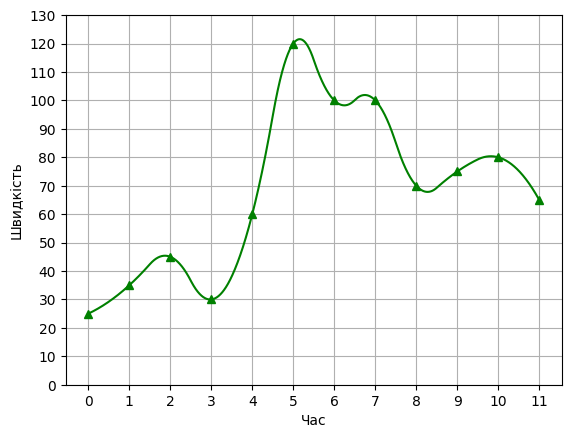

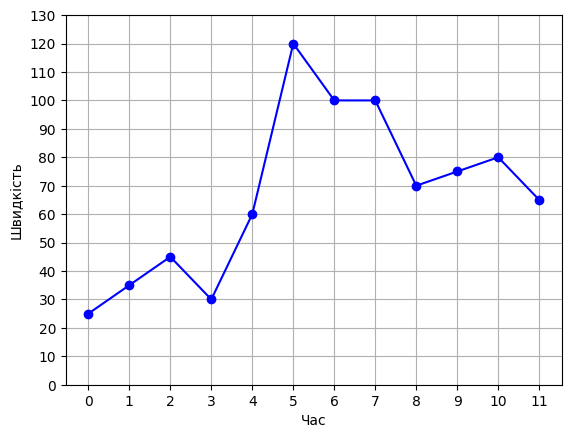

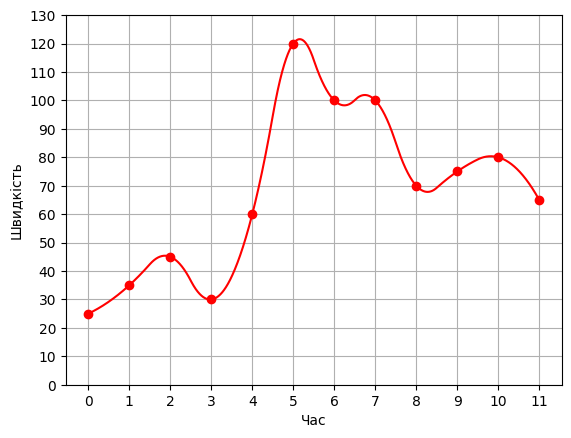

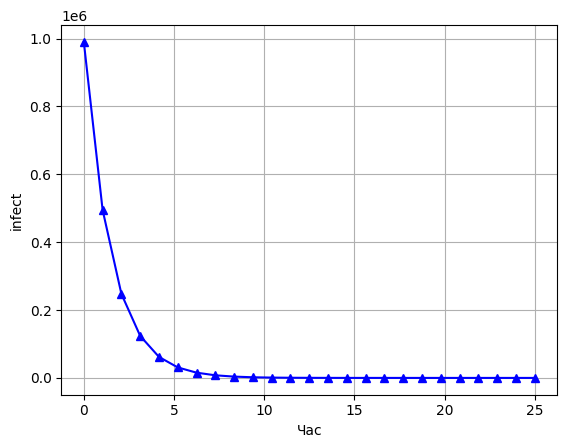

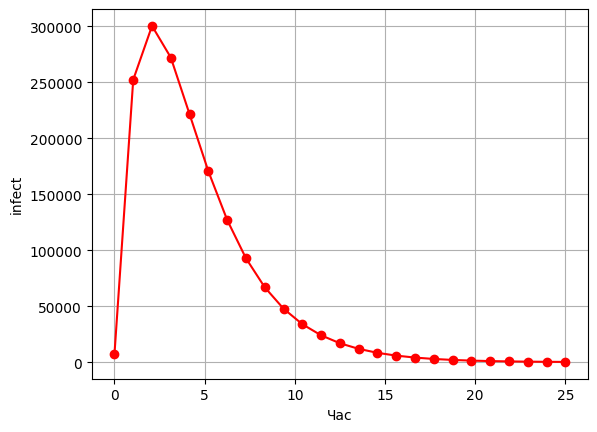

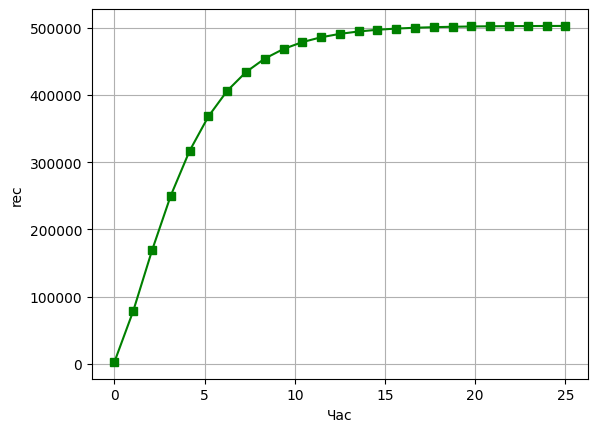

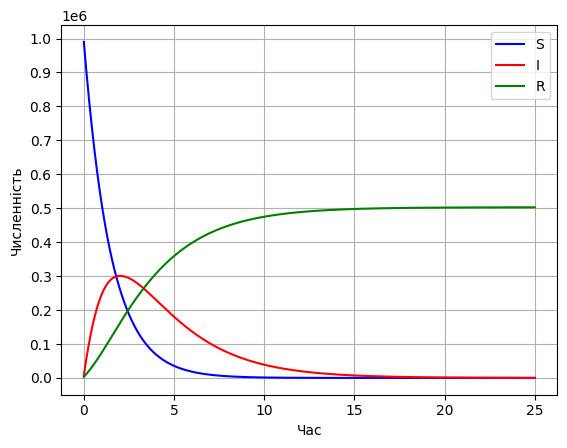

In [7]:
import numpy as np
from scipy import interpolate as interp
import matplotlib.pyplot as plt

speed = [25, 35, 45, 30, 60, 120, 100, 100, 70, 75, 80, 65]
time = np.linspace(0, 11, 12)
alf = 0.5
bet = 0.3
N = 1_000_000
s0 = 990_000
i0 = 7_000
r0 = 3_000
t0 = 0; tf = 25
t = np.linspace(t0, tf, 25)
S = []
S.append(s0)
I = []
I.append(i0)
R = []
R.append(r0)
f = interp.interp1d(time, speed, kind='cubic')
NEWtime = np.linspace(0, 11, 10_000)
NEWspeed = f(NEWtime)
dist = np.trapz(NEWspeed, NEWtime)
f = interp.interp1d(time, speed, kind='quadratic')
NEWtime = np.linspace(0, 11, 10_000)
NEWspeed = f(NEWtime)
dist = np.trapz(NEWspeed, NEWtime)

print(f'Дистанція {dist:.2f} км')
print(f'Дистанція: {dist:.3f} км')
print('Вектор часу: ', time)

for i in range(1, 25):
    S.append(S[-1] - alf * S[-1])
    I.append(I[-1] + alf * S[-1] - bet * I[-1])
    R.append(R[-1] + bet * I[-1])

f_S = interp.interp1d(t, S, kind='cubic')
f_I = interp.interp1d(t, I, kind='cubic')
f_R = interp.interp1d(t, R, kind='cubic')

t_new = np.linspace(t0, tf, 100_000)
S_new = f_S(t_new)
I_new = f_I(t_new)
R_new = f_R(t_new)


plt.plot(NEWtime, NEWspeed, 'g')
plt.plot(time, speed, 'g^')
plt.xlabel('Час')
plt.ylabel('Швидкість')
plt.xticks(time)
plt.yticks(np.arange(0, 140, 10))
plt.grid()
plt.show()

plt.plot(time, speed, 'b', marker = 'o')
plt.xlabel('Час')
plt.ylabel('Швидкість')
plt.xticks(time)
plt.yticks(np.arange(0, 140, 10))
plt.grid()
plt.show()

plt.plot(NEWtime, NEWspeed, 'r')
plt.plot(time, speed, 'ro')
plt.xlabel('Час')
plt.ylabel('Швидкість')
plt.xticks(time)
plt.yticks(np.arange(0, 140, 10))
plt.grid()
plt.show()

plt.plot(t, S, 'b', marker = '^')
plt.xlabel('Час')
plt.ylabel('infect')
plt.grid()
plt.show()

plt.plot(t, I, 'r', marker = 'o')
plt.xlabel('Час')
plt.ylabel('infect')
plt.grid()
plt.show()

plt.plot(t, R, 'g', marker = 's')
plt.xlabel('Час')
plt.ylabel('rec')
plt.grid()
plt.show()

plt.plot(t_new, S_new, 'b', label = 'S')
plt.plot(t_new, I_new, 'r', label = 'I')
plt.plot(t_new, R_new, 'g', label = 'R')
plt.xlabel('Час')
plt.ylabel('Чиcленність')
plt.yticks(np.arange(0, 1_100_000, 100_000))
plt.grid()
plt.legend()
plt.show()